Analytical Solution:
b0: 1.2363636363636363, b1: 1.1696969696969697
SSE: 5.624242424242423, R²: 0.952538038613988

Full-batch Gradient Descent:
b0: 1.2328099487610318, b1: 1.170263693076768
SSE: 5.624278989977716, R²: 0.9525377300423822

Stochastic Gradient Descent:
b0: 0.8967040680508923, b1: 1.2986755729435908
SSE: 7.576246971879953, R²: 0.9360654263976376


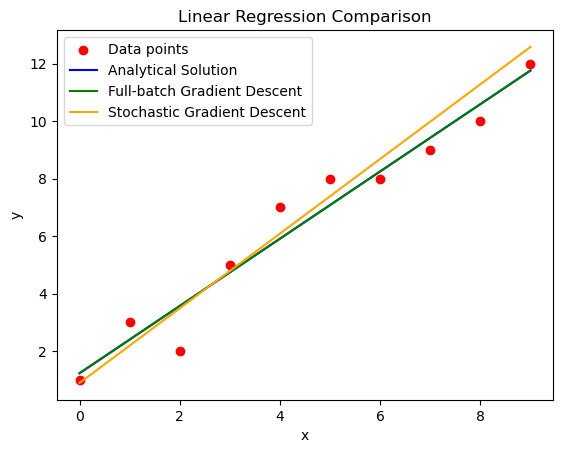

In [2]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Analytical solution
def analytical_solution(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate the coefficients
    b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b0 = y_mean - b1 * x_mean
    
    return b0, b1

# Predict function
def predict(x, b0, b1):
    return b0 + b1 * x

# Sum of Squared Errors (SSE)
def calculate_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Coefficient of Determination (R²)
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Full-batch Gradient Descent
def full_batch_gradient_descent(x, y, alpha=0.01, epochs=1000):
    m = len(y)
    b0 = b1 = 0
    
    for _ in range(epochs):
        y_pred = b0 + b1 * x
        d_b0 = -(2/m) * np.sum(y - y_pred)
        d_b1 = -(2/m) * np.sum((y - y_pred) * x)
        b0 -= alpha * d_b0
        b1 -= alpha * d_b1
        
    return b0, b1

# Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, alpha=0.01, epochs=1000):
    m = len(y)
    b0 = b1 = 0
    
    for _ in range(epochs):
        for i in range(m):
            y_pred = b0 + b1 * x[i]
            d_b0 = -(2) * (y[i] - y_pred)
            d_b1 = -(2) * (y[i] - y_pred) * x[i]
            b0 -= alpha * d_b0
            b1 -= alpha * d_b1
            
    return b0, b1

# Compute regression coefficients using analytical solution
b0_analytical, b1_analytical = analytical_solution(x, y)
y_pred_analytical = predict(x, b0_analytical, b1_analytical)

# Compute SSE and R² for analytical solution
sse_analytical = calculate_sse(y, y_pred_analytical)
r2_analytical = calculate_r2(y, y_pred_analytical)

# Compute regression coefficients using Full-batch Gradient Descent
b0_full_gd, b1_full_gd = full_batch_gradient_descent(x, y)
y_pred_full_gd = predict(x, b0_full_gd, b1_full_gd)

# Compute SSE and R² for Full-batch Gradient Descent
sse_full_gd = calculate_sse(y, y_pred_full_gd)
r2_full_gd = calculate_r2(y, y_pred_full_gd)

# Compute regression coefficients using Stochastic Gradient Descent
b0_sgd, b1_sgd = stochastic_gradient_descent(x, y)
y_pred_sgd = predict(x, b0_sgd, b1_sgd)

# Compute SSE and R² for Stochastic Gradient Descent
sse_sgd = calculate_sse(y, y_pred_sgd)
r2_sgd = calculate_r2(y, y_pred_sgd)

print("Analytical Solution:")
print(f"b0: {b0_analytical}, b1: {b1_analytical}")
print(f"SSE: {sse_analytical}, R²: {r2_analytical}\n")

print("Full-batch Gradient Descent:")
print(f"b0: {b0_full_gd}, b1: {b1_full_gd}")
print(f"SSE: {sse_full_gd}, R²: {r2_full_gd}\n")

print("Stochastic Gradient Descent:")
print(f"b0: {b0_sgd}, b1: {b1_sgd}")
print(f"SSE: {sse_sgd}, R²: {r2_sgd}")



In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the path to the dataset in the Downloads folder
dataset_path = '~/Downloads/BostonHousing.csv'  # Adjust the file path if necessary

# Load dataset from file
data = pd.read_csv(dataset_path)
data.head()
# Input Data (X)
X_input = data.drop(columns='medv')  # Assuming 'medv' is the target column

# Output Data (y)
y_output = data['medv']  # Target variable

# Analyzing Correlations
correlations = X_input.corrwith(y_output)

# Print the correlation values for all attributes
print("Correlation of each attribute with the target variable (medv):")
for attribute, correlation_value in correlations.items():
    print(f"{attribute}: {correlation_value:.4f}")

# Identify the attribute with the highest correlation to the target variable
best_attribute = (correlations**2).idxmax()
print(f"\nAttribute with the highest correlation to medv: {best_attribute}, Correlation: {correlations.abs().max():.4f}")

# Selecting the best attribute for Linear Regression
x = X_input[[best_attribute]].values.flatten()
y = y_output.values


# Analytical solution
def analytical_solution(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate the coefficients
    b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b0 = y_mean - b1 * x_mean
    
    return b0, b1

# Predict function
def predict(x, b0, b1):
    return b0 + b1 * x

# Sum of Squared Errors (SSE)
def calculate_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Coefficient of Determination (R²)
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)


def full_batch_gradient_descent(x, y, alpha=0.001, epochs=10000):
    m = len(y)
    b0 = b1 = 0
    for _ in range(epochs):
        y_pred = b0 + b1 * x
        d_b0 = -(2/m) * np.sum(y - y_pred)
        d_b1 = -(2/m) * np.sum((y - y_pred) * x)
        b0 -= alpha * d_b0
        b1 -= alpha * d_b1
    return b0, b1

def stochastic_gradient_descent(x, y, alpha=0.00001, epochs=1000):
    m = len(y)
    b0 = b1 = 0
    for _ in range(epochs):
        for i in range(m):
            y_pred = b0 + b1 * x[i]
            d_b0 = -(2) * (y[i] - y_pred)
            d_b1 = -(2) * (y[i] - y_pred) * x[i]
            b0 -= alpha * d_b0
            b1 -= alpha * d_b1
    return b0, b1


# Compute regression coefficients using analytical solution
b0_analytical, b1_analytical = analytical_solution(x, y)
y_pred_analytical = predict(x, b0_analytical, b1_analytical)

# Compute SSE and R² for analytical solution
sse_analytical = calculate_sse(y, y_pred_analytical)
r2_analytical = calculate_r2(y, y_pred_analytical)

# Compute regression coefficients using Full-batch Gradient Descent
b0_full_gd, b1_full_gd = full_batch_gradient_descent(x, y)
y_pred_full_gd = predict(x, b0_full_gd, b1_full_gd)

# Compute SSE and R² for Full-batch Gradient Descent
sse_full_gd = calculate_sse(y, y_pred_full_gd)
r2_full_gd = calculate_r2(y, y_pred_full_gd)

# Compute regression coefficients using Stochastic Gradient Descent
b0_sgd, b1_sgd = stochastic_gradient_descent(x, y)
y_pred_sgd = predict(x, b0_sgd, b1_sgd)

# Compute SSE and R² for Stochastic Gradient Descent
sse_sgd = calculate_sse(y, y_pred_sgd)
r2_sgd = calculate_r2(y, y_pred_sgd)

# Display results
print("Analytical Solution:")
print(f"b0: {b0_analytical}, b1: {b1_analytical}")
print(f"SSE: {sse_analytical}, R²: {r2_analytical}\n")

print("Full-batch Gradient Descent:")
print(f"b0: {b0_full_gd}, b1: {b1_full_gd}")
print(f"SSE: {sse_full_gd}, R²: {r2_full_gd}\n")

print("Stochastic Gradient Descent:")
print(f"b0: {b0_sgd}, b1: {b1_sgd}")
print(f"SSE: {sse_sgd}, R²: {r2_sgd}")


Correlation of each attribute with the target variable (medv):
crim: -0.3883
zn: 0.3604
indus: -0.4837
chas: 0.1753
nox: -0.4273
rm: 0.6954
age: -0.3770
dis: 0.2499
rad: -0.3816
tax: -0.4685
ptratio: -0.5078
b: 0.3335
lstat: -0.7377

Attribute with the highest correlation to medv: lstat, Correlation: 0.7377
Analytical Solution:
b0: 34.5538408793831, b1: -0.9500493537579907
SSE: 19472.38141832644, R²: 0.5441462975864797

Full-batch Gradient Descent:
b0: 34.27230357706076, b1: -0.9331466362919295
SSE: 19482.055739702933, R²: 0.5439198191130424

Stochastic Gradient Descent:
b0: 31.445323966159428, b1: -0.798183438613218
SSE: 20779.190257821538, R²: 0.5135535500928476
